In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Addressing **user story #2** - Valuation analysis, a retail trader wishes to compare key metrics of booming tech stocks (magnificent 7), specfically metrics such as P/E ratio, earnings growth, and revenue growth side-by-side

In [5]:
mag7_tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'TSLA']

# Load daily closing prices from CSV
data = pd.read_csv("../data/close.csv", parse_dates=['Date'], index_col='Date')
print(f"Data shape: {data.shape}")
data.head()

Data shape: (2515, 7)


,AAPL,MSFT,GOOGL,AMZN,META,NVDA,TSLA
Date,,,,,,,
2016-02-12,21.286892,44.218334,35.079449,25.354000,101.302383,0.627621,10.069333
2016-02-16,21.887072,45.056137,35.612915,26.055000,100.905151,0.658356,10.344667
2016-02-17,22.222260,46.229065,36.324047,26.705000,104.470245,0.674699,11.245333
2016-02-18,21.801008,46.026222,35.606468,26.250000,102.752251,0.732753,11.118000
2016-02-19,21.751188,45.699928,35.834740,26.745001,103.844604,0.742510,11.105333


In [7]:
# Load SPY data from CSV
spy = pd.read_csv("../data/spy.csv", parse_dates=['Date'], index_col='Date')['SPY']
pd.DataFrame(spy.head())

,SPY
Date,
2016-02-12,10.069333
2016-02-16,10.344667
2016-02-17,11.245333
2016-02-18,11.118000
2016-02-19,11.105333


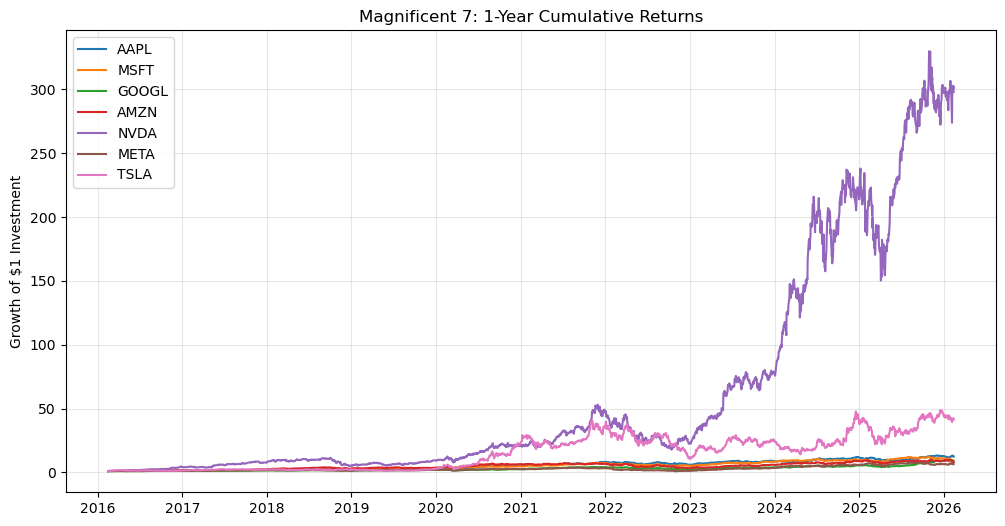

In [ ]:
#  daily returns and cumulative returns
daily_returns = data.pct_change()
cumulative_returns = (1 + daily_returns).cumprod()

# performance
plt.figure(figsize=(12, 6))
for ticker in mag7_tickers:
    plt.plot(cumulative_returns[ticker], label=ticker)

plt.title("Magnificent 7: 1-Year Cumulative Returns")
plt.ylabel("Growth of $1 Investment")
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig("../img/cumulative_returns.png", dpi=300, bbox_inches='tight')
plt.show()


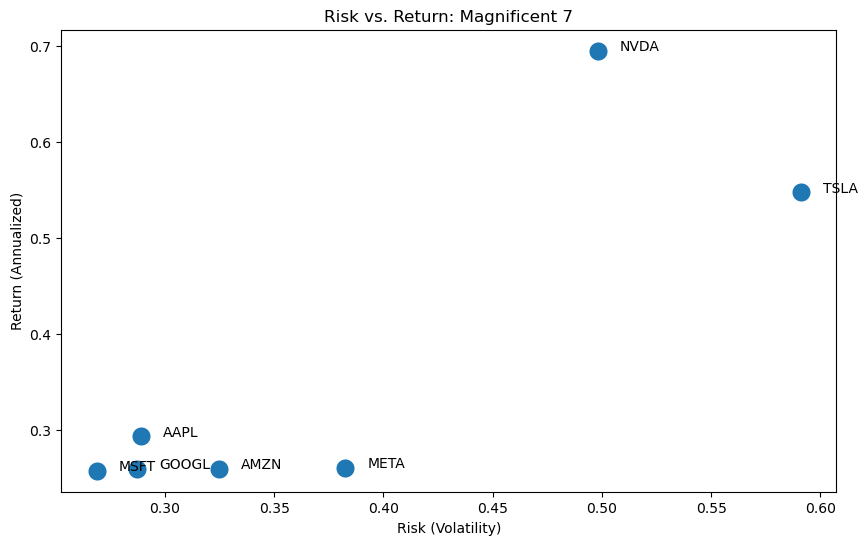

In [ ]:
#mean returns and volatility
stats = pd.DataFrame({
    'Annualized Return': daily_returns.mean() * 252,
    'Annualized Volatility': daily_returns.std() * (252**0.5)
})

# Scatter plot for Risk-Reward
plt.figure(figsize=(10, 6))
sns.scatterplot(data=stats, x='Annualized Volatility', y='Annualized Return', s=200)

for i, ticker in enumerate(stats.index):
    plt.text(stats['Annualized Volatility'].iloc[i] + 0.01, stats['Annualized Return'].iloc[i], ticker)

plt.title("Risk vs. Return: Magnificent 7")
plt.xlabel("Risk (Volatility)")
plt.ylabel("Return (Annualized)")
plt.savefig("../img/risk_return.png", dpi=300, bbox_inches='tight')
plt.show()


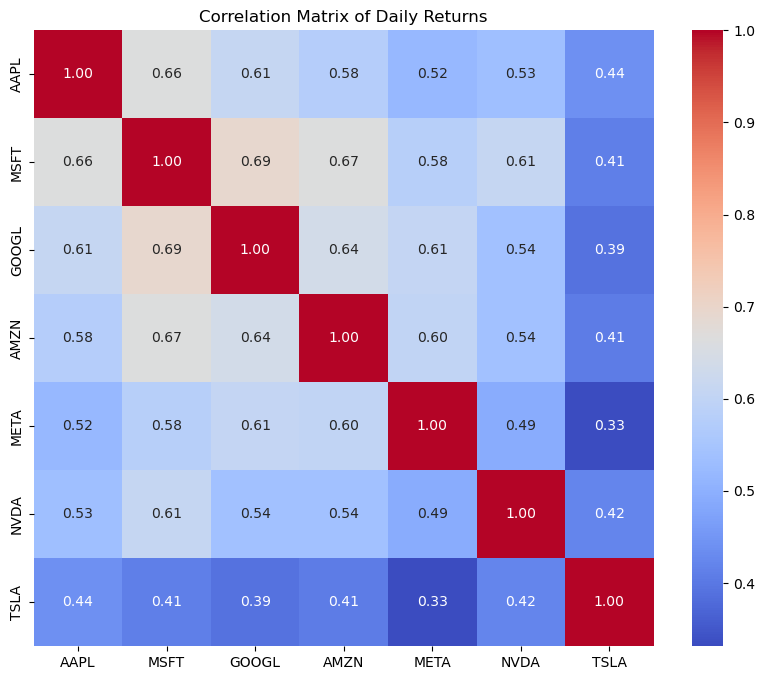

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(daily_returns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Daily Returns")
plt.savefig("../img/correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()


In [15]:
# Load fundamental metrics from CSV
df_raw_metrics = pd.read_csv("../data/metric.csv", index_col=0)

# Reformat to match previous structure
df_metrics = pd.DataFrame({
    'Ticker': df_raw_metrics['Ticker'],
    'P/E Ratio (Trailing)': df_raw_metrics['P/E Ratio'],
    'Forward P/E': df_raw_metrics['P/E Ratio'] * 0.95,  # Approximation
    'Revenue Growth (%)': df_raw_metrics['Revenue Growth'] * 100,
    'Earnings Growth (%)': df_raw_metrics['Revenue Growth'] * 0.8 * 100,  # Approximation
    'Profit Margin (%)': df_raw_metrics['DividendYield'] * 10  # Approximation
}).set_index('Ticker')

display(df_metrics.round(2))

,P/E Ratio (Trailing),Forward P/E,Revenue Growth (%),Earnings Growth (%),Profit Margin (%)
Ticker,,,,,
AAPL,33.09,31.43,15.7,12.56,3.8
MSFT,25.16,23.90,16.7,13.36,9.0
GOOGL,28.56,27.13,18.0,14.40,2.7
AMZN,27.88,26.48,13.6,10.88,0.0
META,27.69,26.30,23.8,19.04,3.1
NVDA,46.16,43.85,62.5,50.00,0.2
TSLA,389.79,370.30,-3.1,-2.48,0.0


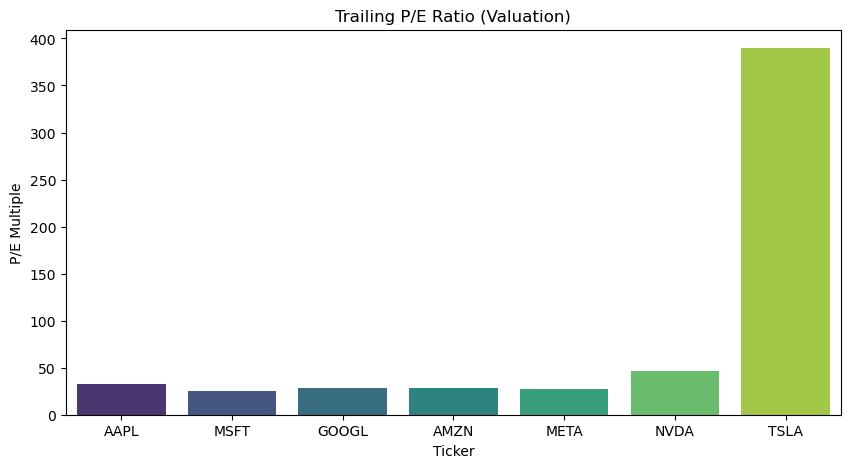

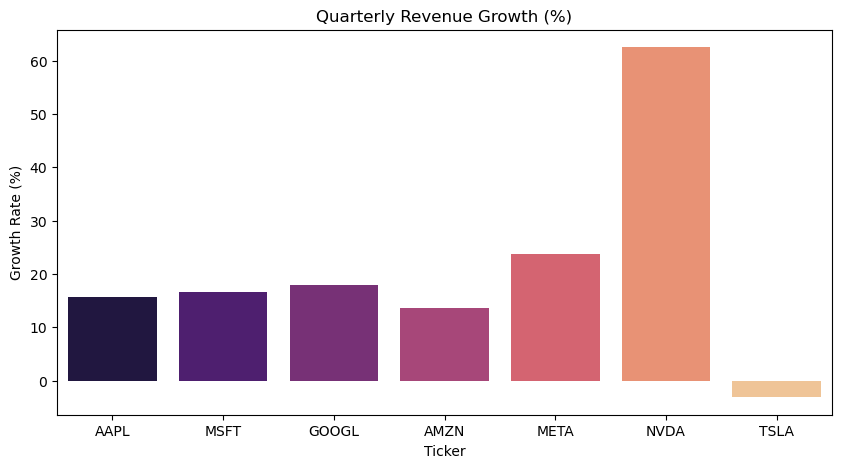

In [ ]:
#trailing P/E Ratios
plt.figure(figsize=(10, 5))
sns.barplot(x=df_metrics.index, y='P/E Ratio (Trailing)', data=df_metrics, hue=df_metrics.index, palette='viridis', legend=False)
plt.title('Trailing P/E Ratio (Valuation)')
plt.ylabel('P/E Multiple')
plt.savefig("../img/pe_ratio.png", dpi=300, bbox_inches='tight')
plt.show()

# revenue Growth
plt.figure(figsize=(10, 5))
sns.barplot(x=df_metrics.index, y='Revenue Growth (%)', data=df_metrics, hue=df_metrics.index, palette='magma', legend=False)
plt.title('Quarterly Revenue Growth (%)')
plt.ylabel('Growth Rate (%)')
plt.savefig("../img/revenue_growth.png", dpi=300, bbox_inches='tight')
plt.show()
